In [542]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import math
import numpy as np

In [543]:
dados=pd.read_csv('games.csv')
dados.head()

,season,home,pts_home,wl_home,away,pts_away,wl_away
0,1947,GSW,66,1,BOS,54,0
1,1947,NYK,64,1,GSW,60,0
2,1947,GSW,62,1,NYK,51,0
3,1947,BOS,65,0,NYK,90,1
4,1947,NYK,62,1,BOS,44,0


In [544]:
def pyth_exp(made,allow):
  return made**2/(made**2+allow**2)

In [545]:
home_w=dados.query("home=='WAS' and wl_home==1")
away_w=dados.query("away=='WAS' and wl_away==1")
home=dados.query("home=='WAS'")
away=dados.query("away=='WAS'")
games=home.shape[0]+away.shape[0]
games_w=home_w.shape[0]+away_w.shape[0]
win_perc=games_w/games
win_perc = round(win_perc, 4)
print("Ganhou %.0f jogos de %.0f, portanto tem um aproveitamento de %.4f."%(games_w,games,win_perc))

Ganhou 2052 jogos de 4516, portanto tem um aproveitamento de 0.4544.


In [546]:
pth_m=dados.query("home=='WAS'")["pts_home"].sum()
pth_a=dados.query("home=='WAS'")["pts_away"].sum()
pta_m=dados.query("away=='WAS'")["pts_away"].sum()
pta_a=dados.query("away=='WAS'")["pts_home"].sum()
pt_made=pth_m+pta_m
pt_allow = pth_a + pta_a
print("Os pontos marcados e permitidos são, respectivamente,%.0f e %.0f."%(pt_made,pt_allow))
print("A expectativa pitagórica é de %.4f."%(pyth_exp(pt_made,pt_allow)))

Os pontos marcados e permitidos são, respectivamente,471509 e 477840.
A expectativa pitagórica é de 0.4933.


In [547]:
pyth=pd.read_csv('pythagorean.csv')
pyth.set_index('team',inplace=True)
pyth.head()

,wins,games,win_perc,pts_made,pts_allow,pyth_exp
team,,,,,,
ATL,2583,5189,0.4978,531868,533111,0.4988
BKN,1551,3622,0.4282,369031,376958,0.4894
BOS,3105,5256,0.5908,554328,539600,0.5135
CHA,1132,2549,0.4441,256910,261911,0.4904
CHI,2147,4189,0.5125,429550,428070,0.5017


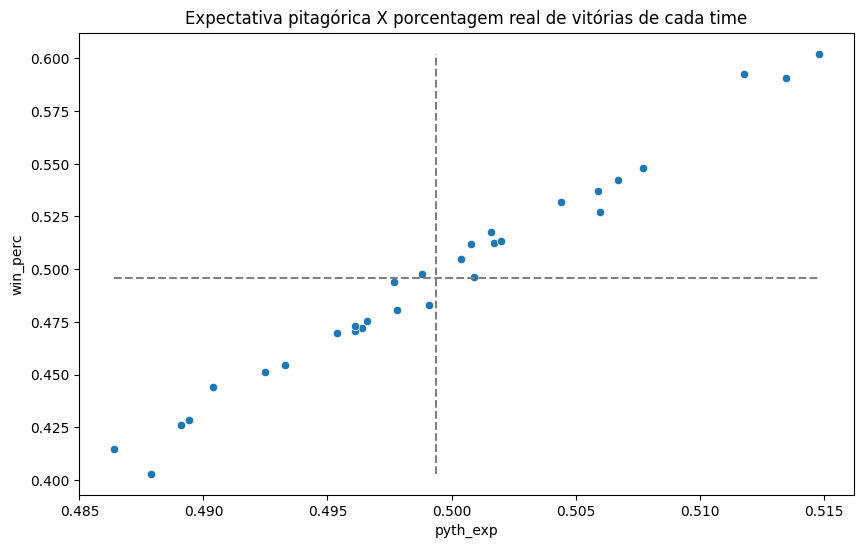

In [548]:
x = pyth.pyth_exp
y = pyth.win_perc

ax = sns.scatterplot(data=pyth, x="pyth_exp", y="win_perc")
ax.figure.set_size_inches(10, 6)
ax.set_title("Expectativa pitagórica X porcentagem real de vitórias de cada time")
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='gray', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='gray', linestyles='dashed')

Text(0.5, 1.05, 'Expectativa pitagórica X porcentagem real de vitórias de cada time')

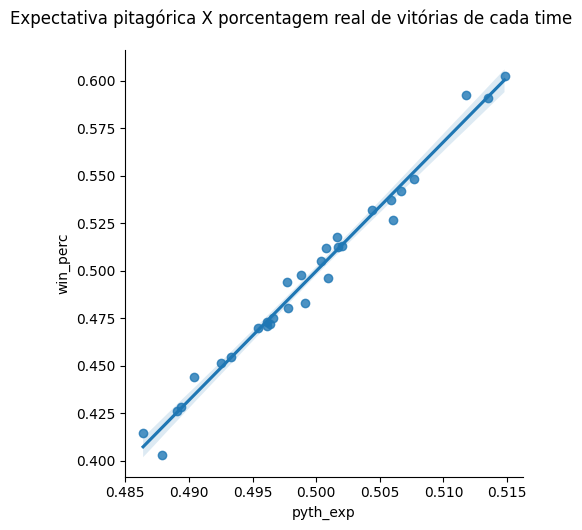

In [549]:
ax=sns.lmplot(x='pyth_exp',y='win_perc',data=pyth)
ax.fig.suptitle("Expectativa pitagórica X porcentagem real de vitórias de cada time",y=1.05)

In [550]:
corr=pyth.corr()
corr

,wins,games,win_perc,pts_made,pts_allow,pyth_exp
wins,1.000000,0.867366,0.606902,0.955113,0.938493,0.583713
games,0.867366,1.000000,0.356588,0.900015,0.897278,0.325501
win_perc,0.606902,0.356588,1.000000,0.358627,0.310600,0.991663
pts_made,0.955113,0.900015,0.358627,1.000000,0.998609,0.334829
pts_allow,0.938493,0.897278,0.310600,0.998609,1.000000,0.286120
pyth_exp,0.583713,0.325501,0.991663,0.334829,0.286120,1.000000


<Axes: >

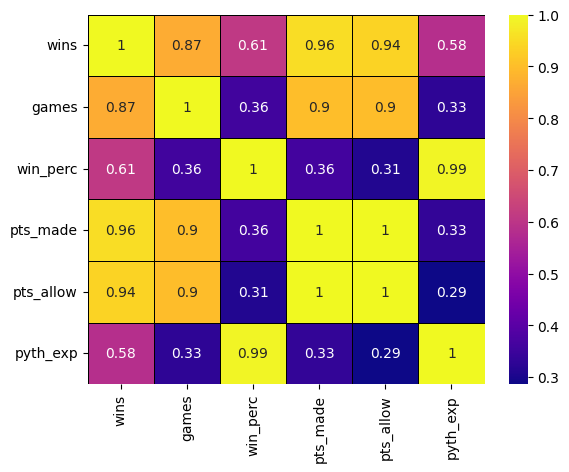

In [601]:
sns.heatmap(corr,annot=True,cmap='plasma',linecolor='black',linewidths=0.6)

In [552]:
pyth_lm=smf.ols(formula='win_perc ~ pyth_exp', data=pyth).fit()

#Primeiro modo de calcular R²

In [553]:
print(pyth_lm.summary())

                            OLS Regression Results                            
Dep. Variable:               win_perc   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1658.
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.82e-26
Time:                        18:34:31   Log-Likelihood:                 108.94
No. Observations:                  30   AIC:                            -213.9
Df Residuals:                      28   BIC:                            -211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8987      0.083    -34.773      0.0

In [554]:
x=pyth.pyth_exp
y=pyth.win_perc
SOMA_X = pyth.pyth_exp.sum()
SOMA_Y = pyth.win_perc.sum()
SOMA_X2 = pyth.pyth_exp.apply(lambda x: x**2).sum()
SOMA_Y2 = pyth.win_perc.apply(lambda y: y**2).sum()
SOMA_XY = pyth.apply(lambda data: data.pyth_exp * data.win_perc, axis = 1).sum()

In [555]:
n=30
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador / denominador
print("O coeficiente angular da reta de regressão é",beta_2.round(2))

O coeficiente angular da reta de regressão é 6.8


In [556]:
beta_1 = pyth.win_perc.mean() - beta_2 * pyth.pyth_exp.mean()
print("O coeficiente linear da reta de regressão é",beta_1.round(2))

O coeficiente linear da reta de regressão é -2.9


In [557]:
print("A reta de regressão é y=%.2f+%.2fx"%(beta_1,beta_2))

A reta de regressão é y=-2.90+6.80x


In [558]:
def previsão(x):
  print("Dada a expectativa pitagórica %.3f, a previsão da porcentagem real de vitórias é %.3f."%(x,beta_1 + beta_2 * x))
previsão(0.515)

Dada a expectativa pitagórica 0.515, a previsão da porcentagem real de vitórias é 0.602.


### Outra maneira de obter os coeficientes

In [559]:
pyth_lm.params

Intercept   -2.898724
pyth_exp     6.797114
dtype: float64

$\beta_1$ é o intercepto, enquanto $\beta_2$ é o pyth_exp.

### Intervalos de confiança

In [560]:
pyth_lm.conf_int(alpha=0.05)

,0,1
Intercept,-3.069482,-2.727966
pyth_exp,6.455205,7.139022


A um nível de 95%, o intervalo de confiança de $\beta_1$ é [-3.07, -2.73], enquanto o de $\beta_2$ é [6.46, 7.14].

### Previsões no *dataframe*

In [561]:
pyth.insert(pyth.columns.get_loc("pts_made"), 'prev_win_perc', (pyth_lm.predict()).round(4))
pyth

,wins,games,win_perc,prev_win_perc,pts_made,pts_allow,pyth_exp
team,,,,,,,
ATL,2583,5189,0.4978,0.4917,531868,533111,0.4988
BKN,1551,3622,0.4282,0.4278,369031,376958,0.4894
BOS,3105,5256,0.5908,0.5916,554328,539600,0.5135
CHA,1132,2549,0.4441,0.4346,256910,261911,0.4904
CHI,2147,4189,0.5125,0.5114,429550,428070,0.5017
CLE,1853,3943,0.4699,0.4686,399130,402790,0.4954
DAL,1706,3379,0.5049,0.5026,350205,349939,0.5004
DEN,1790,3623,0.4941,0.4842,389525,391353,0.4977
DET,2484,5225,0.4754,0.4767,532200,535839,0.4966


#Segundo modo

In [562]:
SQE=pyth_lm.ssr
SQR=pyth_lm.ess
SQT=SQE+SQR
print("A soma dos quadrados dos erros é", SQE.round(3))
print("A soma dos quadrados dos pontos da regressão é",SQR.round(3))
print("A soma dos quadrados totais é",SQT.round(3))

A soma dos quadrados dos erros é 0.001
A soma dos quadrados dos pontos da regressão é 0.073
A soma dos quadrados totais é 0.074


In [563]:
EQM=pyth_lm.mse_resid
print("O erro quadrático médio é",EQM)

O erro quadrático médio é 4.3977042679913256e-05


In [564]:
R2=SQR/SQT
print("O coeficiente de regressão do modelo é",R2.round(3))

O coeficiente de regressão do modelo é 0.983


#Terceiro modo

In [565]:
pyth_lm.rsquared.round(3)

0.983

# Teste de hipótese para a nulidade do coeficiente angular

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$
# $$E(b_2) = \beta_2$$

### $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

In [566]:
s = np.sqrt(pyth_lm.mse_resid)
s

0.006631518881818347

In [567]:
SOMA_DESVIO2 = pyth.pyth_exp.apply(lambda x: (x - pyth.pyth_exp.mean())**2).sum()
SOMA_DESVIO2

0.0015784786666666693

In [568]:
s_beta_2 = s / np.sqrt(SOMA_DESVIO2)
s_beta_2

0.16691434100984504

### Áreas de aceitação e rejeição de $H_0$

In [569]:
from scipy.stats import t as t_student

In [570]:
graus_de_liberdade = pyth_lm.df_resid
graus_de_liberdade

28.0

In [571]:
significancia=0.05
confiança=1-significancia
probabilidade = (0.5 + (0.95 / 2))
probabilidade

0.975

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

In [572]:
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha_2

2.048407141795244

### $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

In [573]:
t = (beta_2 - 0) / s_beta_2
t

40.72216603124802

### Critério do valor crítico

> ### Teste Bicaudal
> ### <font color='lightgreen'>Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$</font>

In [574]:
t <= -t_alpha_2

False

In [575]:
t >= t_alpha_2

True

### Critério do p-valor

> ### Teste Bicaudal
> ### <font color='lightyellow'>Rejeitar $H_0$ se $p-valor\leq\alpha$</font>

In [576]:
p_valor = 2 * (t_student.sf(t, graus_de_liberdade))
p_valor

1.823977221052551e-26

In [577]:
p_valor <= significancia

True

### <font color='lightblue'>Rejeito $H_0$, logo existe uma relação significativa entre as duas variáveis.</font>

#Teste F

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

### $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

In [578]:
pyth_lm.fvalue

1658.2948062794328

### Teste do p-valor

In [579]:
pyth_lm.f_pvalue

1.8239772210085797e-26

In [580]:
p_valor <= 0.05

True

### <font color='lightblue'>Rejeito $H_0$, logo $\beta_2 \neq 0$.</font>

# Resíduos

In [581]:
pyth['residue'] = (pyth_lm.resid).round(4)
pyth.head()

,wins,games,win_perc,prev_win_perc,pts_made,pts_allow,pyth_exp,residue
team,,,,,,,,
ATL,2583,5189,0.4978,0.4917,531868,533111,0.4988,0.0061
BKN,1551,3622,0.4282,0.4278,369031,376958,0.4894,0.0004
BOS,3105,5256,0.5908,0.5916,554328,539600,0.5135,-0.0008
CHA,1132,2549,0.4441,0.4346,256910,261911,0.4904,0.0095
CHI,2147,4189,0.5125,0.5114,429550,428070,0.5017,0.0011


In [582]:
pyth.residue.mean()

-3.333333333333264e-06

## Normalidade dos resíduos: Omnibus
> ### $H_0:$ Os dados se distribuem como uma normal

In [583]:
from scipy.stats import normaltest
statistic,p_valor=normaltest(pyth.residue)

In [584]:
p_valor<=0.05

False

### <font color='red'>Rejeito $H_0$, logo os dados não se distribuem como uma normal.</font>

### DIstribuição dos resíduos

In [585]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

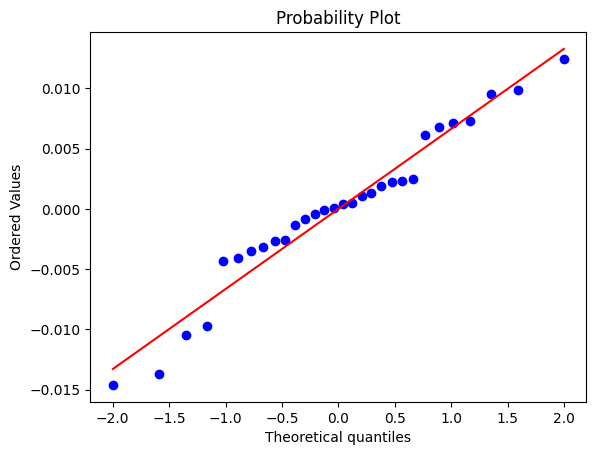

In [586]:
(_,(_,_,_))=probplot(pyth.residue,plot=plt)

Os dados/pontos não estão alinhados à reta, logo não se distribuem como uma normal.

## Normalidade dos resíduos: Jarque-Bera

### Simetria

In [587]:
from scipy.stats import skew
S=skew(pyth.residue)
S

-0.3716096362952579

### Curtose

In [588]:
from scipy.stats import kurtosis
C=3+kurtosis(pyth.residue)
C

3.0244100681777164

### $$JB = \frac{n}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$

In [589]:
JB=(n/6)*(S**2+(1/4)*(C-3)**2)
JB

0.6912134232230203

### Teste do p-valor

In [590]:
from scipy.stats import chi2
p_valor=chi2.sf(JB,2)
p_valor

0.7077907982770808

In [591]:
p_valor<=0.05

False

### <font color='red'>Rejeito $H_0$, logo os dados não se distribuem como uma normal.</font>